In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from torch.utils.data import DataLoader,Dataset
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms



In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
print(torch.__version__)

2.0.1+cu117


In [3]:
dataset_fmnist = FashionMNIST(root='G:/py-py-py-pytorch/cnn/data/',
                              train=True,
                              download=True)

<class 'tuple'>


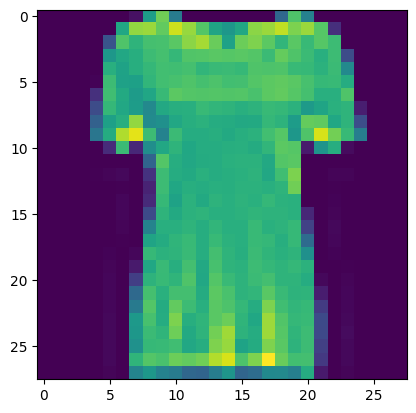

In [9]:
print(type(dataset_fmnist[10]))

img, label = dataset_fmnist[10]

plt.imshow(img)

In [11]:
features, labels = dataset_fmnist.data, dataset_fmnist.targets

In [15]:
print(len(dataset_fmnist))
print(features.shape)

60000
torch.Size([60000, 28, 28])


In [16]:
labels.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

label_x_row =  [    1     2     4 ... 59974 59985 59998]
label_x_row =  [   16    21    38 ... 59989 59991 59996]
label_x_row =  [    5     7    27 ... 59977 59981 59993]
label_x_row =  [    3    20    25 ... 59971 59980 59997]
label_x_row =  [   19    22    24 ... 59984 59986 59990]
label_x_row =  [    8     9    12 ... 59983 59995 59999]
label_x_row =  [   18    32    33 ... 59973 59987 59988]
label_x_row =  [    6    14    41 ... 59951 59979 59992]
label_x_row =  [   23    35    57 ... 59962 59967 59994]
label_x_row =  [    0    11    15 ... 59932 59970 59978]


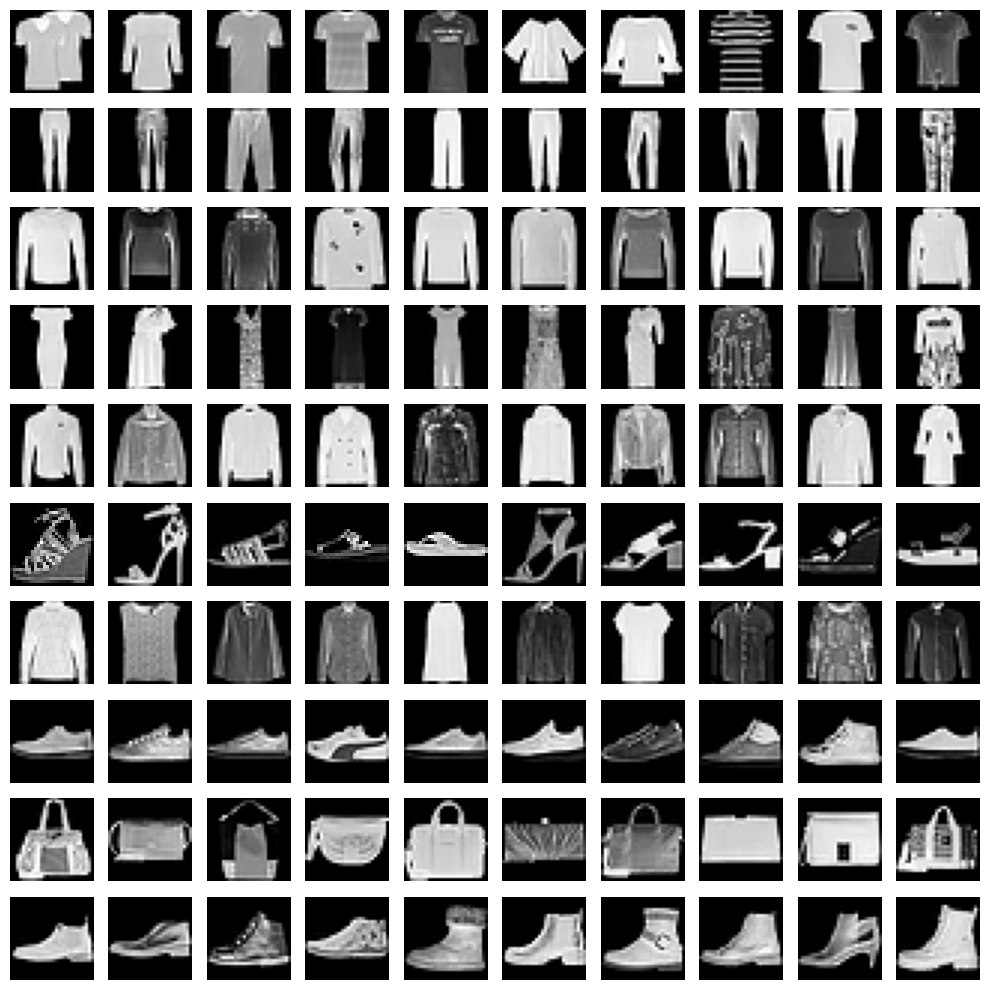

In [19]:
row,col = 10,10
fig, ax = plt.subplots(row,col,figsize=(10,10))

for l,row_val in enumerate(ax):
    label_x_row = np.where(labels == l)[0]
    print("label_x_row = ",label_x_row )

    for cell in row_val:
        cell.grid(False)
        cell.axis('off')

        random_image_idx = np.random.choice(label_x_row)

        x,y = features[random_image_idx],labels[random_image_idx]
        cell.imshow(x,cmap='gray')

plt.tight_layout()

In [ ]:
#Building the neural network

In [21]:
#3 functions - init, getitem and len

In [23]:
class DatasetTransformer(Dataset):
    def __init__(self,x,y):
        '''Takes 2 tensors x and y'''
        x = x.float()
        x = x.view(-1,28*28) #Flattem
        self.x = x
        self.y = y

    def __getitem__(self, index):
        x = self.x[index]
        y = self.y[index]
        # model should reside in the same device either cpu or gpu
        return x.to(device), y.to(device)
    
    def __len__(self):
        return len(self.x)

In [24]:
#create a dataloader

def loadData():
    train_data = DatasetTransformer(features,labels)
    Dloader = DataLoader(train_data,batch_size=16,shuffle=True)
    return Dloader